<a href="https://colab.research.google.com/github/Shubh0405/VIThack20-Covid19Website/blob/Task4/calculating_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [209]:
df = pd.read_csv("covid19india.csv")

In [210]:
df_train = df.copy()

In [212]:
df_train.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patientId       27891 non-null  int64  
 1   reportedOn      27891 non-null  object 
 2   onsetEstimate   0 non-null      float64
 3   ageEstimate     2346 non-null   object 
 4   gender          5313 non-null   object 
 5   city            2350 non-null   object 
 6   district        21051 non-null  object 
 7   state           27890 non-null  object 
 8   status          27891 non-null  object 
 9   notes           26555 non-null  object 
 10  contractedFrom  1638 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.3+ MB


,patientId,reportedOn,onsetEstimate,ageEstimate,gender,city,district,state,status,notes,contractedFrom
0,1,30/01/2020,NaN,20,female,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,NaN
1,2,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,NaN
2,3,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,NaN
3,4,02/03/2020,NaN,45,male,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",NaN
4,5,02/03/2020,NaN,24,male,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN


In [213]:
df_train.isnull()

,patientId,reportedOn,onsetEstimate,ageEstimate,gender,city,district,state,status,notes,contractedFrom
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,True,True,False,False,False,False,False,True
2,False,False,True,True,True,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
27886,False,False,True,True,True,True,True,False,False,False,True
27887,False,False,True,True,True,True,True,False,False,False,True
27888,False,False,True,False,False,True,False,False,False,False,True
27889,False,False,True,False,False,True,False,False,False,False,True


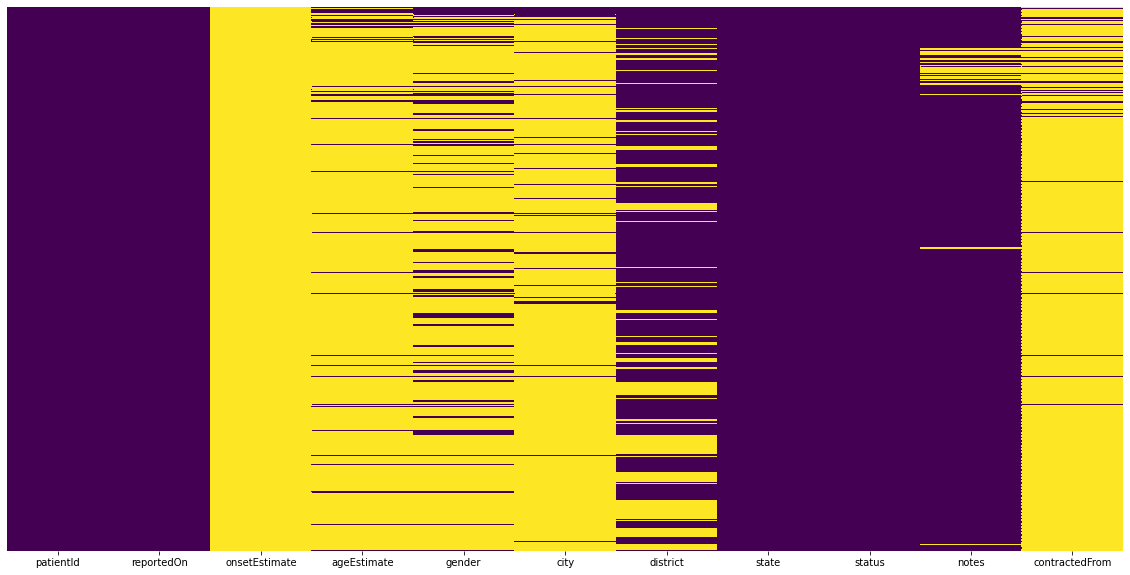

In [214]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [215]:
df_train.drop('onsetEstimate',axis=1,inplace=True)
df_train.drop('contractedFrom',axis=1,inplace=True)
df_train.drop('notes',axis=1,inplace=True)

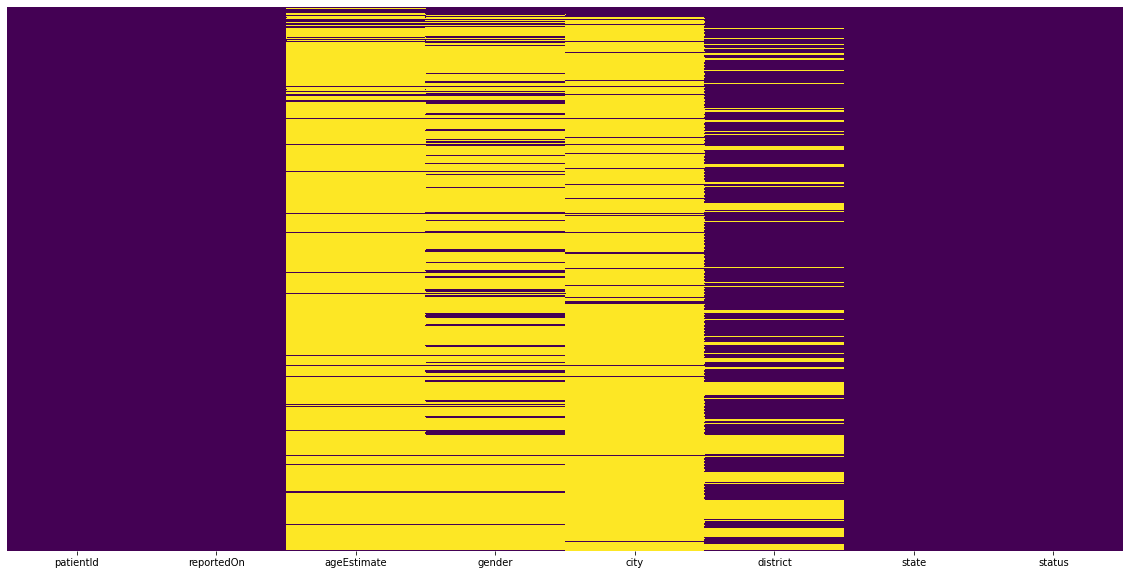

In [216]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [217]:
from sklearn.preprocessing import LabelEncoder
df_train.gender = pd.Categorical(df_train.gender)
df_train['gender'] = df_train.gender.cat.codes
df_train.city = pd.Categorical(df_train.city)
df_train['city'] = df_train.city.cat.codes

df_train.district = pd.Categorical(df_train.district)
df_train['district'] = df_train.district.cat.codes

df_train.state = pd.Categorical(df_train.state)
df_train['state'] = df_train.state.cat.codes


df_train.status = pd.Categorical(df_train.status)
df_train['status'] = df_train.status.cat.codes

In [218]:
df_train.head(10)

,patientId,reportedOn,ageEstimate,gender,city,district,state,status
0,1,30/01/2020,20,0,471,406,15,3
1,2,02/02/2020,NaN,-1,11,8,15,3
2,3,03/02/2020,NaN,-1,212,206,15,3
3,4,02/03/2020,45,1,122,111,7,3
4,5,02/03/2020,24,1,169,158,27,3
5,6,03/03/2020,69,1,178,163,25,3
6,7,04/03/2020,55,-1,151,163,10,3
7,8,04/03/2020,55,-1,151,163,10,3
8,9,04/03/2020,55,-1,151,163,10,3
9,10,04/03/2020,55,-1,151,163,10,3


In [219]:
(df_train['ageEstimate']=='28-35').any()

True

In [220]:
index_list = df_train[(df_train['ageEstimate'] == '28-35')].index.tolist()
print(index_list)

[924, 925, 926, 927]


In [221]:
row1 = df_train.iloc[[924,925,926,927]] 
print(row1)

     patientId  reportedOn ageEstimate  gender  city  district  state  status
924        925  28/03/2020       28-35       1   156        35     12       1
925        926  28/03/2020       28-35       1   156        35     12       1
926        927  28/03/2020       28-35       1   156        35     12       1
927        928  28/03/2020       28-35       1   156        35     12       1


In [222]:
#replacing values '28-35' in ageEstimate with mean '31.5'
df_train['ageEstimate'].replace({"28-35": '31.5'}, inplace=True)
row1 = df_train.iloc[[924,925,926,927]] 
print(row1)

     patientId  reportedOn ageEstimate  gender  city  district  state  status
924        925  28/03/2020        31.5       1   156        35     12       1
925        926  28/03/2020        31.5       1   156        35     12       1
926        927  28/03/2020        31.5       1   156        35     12       1
927        928  28/03/2020        31.5       1   156        35     12       1


In [223]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   patientId    27891 non-null  int64 
 1   reportedOn   27891 non-null  object
 2   ageEstimate  2346 non-null   object
 3   gender       27891 non-null  int8  
 4   city         27891 non-null  int16 
 5   district     27891 non-null  int16 
 6   state        27891 non-null  int8  
 7   status       27891 non-null  int8  
dtypes: int16(2), int64(1), int8(3), object(2)
memory usage: 844.5+ KB


In [224]:
df_train['status_int']=df_train['status']
df_train['ageEstimate']=df_train['ageEstimate'].astype(float)

In [225]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   patientId    27891 non-null  int64  
 1   reportedOn   27891 non-null  object 
 2   ageEstimate  2346 non-null   float64
 3   gender       27891 non-null  int8   
 4   city         27891 non-null  int16  
 5   district     27891 non-null  int16  
 6   state        27891 non-null  int8   
 7   status       27891 non-null  int8   
 8   status_int   27891 non-null  int8   
dtypes: float64(1), int16(2), int64(1), int8(4), object(1)
memory usage: 871.7+ KB


In [226]:
#regression model to calculate missing values

In [227]:
import math
print("Correlation: ", df_train['status_int'].corr(df_train['ageEstimate']))

Correlation:  -0.020725577219132662


In [228]:
from sklearn.linear_model import LinearRegression
'''df_filter = df_train[df_train['ageEstimate'] <= df_train['ageEstimate'].mean() + df_train['ageEstimate'].std() ].copy() '''
#the above filter is not suitable in current category(more exploration needed for better filter)
#below filter optimal as of now
df_filter = df_train[df_train['ageEstimate'] > 0].copy()
y_pred = []
y_true = []

In [229]:
from sklearn.model_selection import KFold

In [230]:
#simple linear regression model to predict missing values

kf = KFold(n_splits=10, random_state = None)
for train_index, test_index in kf.split(df_filter):
    df_test1 = df_filter.iloc[test_index]
    df_train1 = df_filter.iloc[train_index]
    X_train = np.array(df_train1['status_int']).reshape(-1, 1)     
    y_train = np.array(df_train1['ageEstimate']).reshape(-1, 1)
    X_test = np.array(df_test1['status_int']).reshape(-1, 1)  
    y_test = np.array(df_test1['ageEstimate']).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test[0])
   

In [231]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Random Forest Regressor model to predict missing values
'''features = ['status_int']
for train_index, test_index in kf.split(df_filter):
    df_test1 = df_filter.iloc[test_index]
    df_train1 = df_filter.iloc[train_index]
    
    X_train = np.array(df_train1[features])
    y_train = np.array(df_train1['ageEstimate'])
    X_test = np.array(df_test1[features])
    y_test = np.array(df_test1['ageEstimate'])
    model = RandomForestRegressor(n_estimators = 1000, max_depth = 1000, random_state = None)
    model.fit(X_train, y_train)
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test[0])'''

In [233]:
from sklearn.metrics import mean_squared_error

In [234]:
print("Mean Square Error: ", mean_squared_error(y_true, y_pred))

Mean Square Error:  208.41785375592627


In [235]:
df_missing = df_train[df_train['ageEstimate'].isnull()].copy()
X_test_lr = np.array(df_missing['status_int']).reshape(-1, 1)
X_train_lr = np.array(df_filter['status_int']).reshape(-1, 1)    
y_train_lr = np.array(df_filter['ageEstimate']).reshape(-1, 1)
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)
print("Linear regression predictions: ", model_lr.predict(X_test_lr)[0][0])

Linear regression predictions:  37.03147513178


In [236]:
#final model which gives best possible outcome
def predict_missing_values(messy_df, metric, colnames):
    
    # Create X_df of predictor columns
    X_df = messy_df.drop(colnames, axis = 1)
    
    # Create Y_df of predicted columns
    Y_df = messy_df[colnames]
        
    # Create empty dataframes and list
    Y_pred_df = pd.DataFrame(columns=colnames)
    Y_missing_df = pd.DataFrame(columns=colnames)
    missing_list = []
    
    # Loop through all columns containing missing values
    for col in messy_df[colnames]:
    
        # Number of missing values in the column
        missing_count = messy_df[col].isnull().sum()
        
        # Separate train dataset which does not contain missing values
        messy_df_train = messy_df[~messy_df[col].isnull()]
        
        # Create X and Y within train dataset
        msg_cols_train_df = messy_df_train[col]
        messy_df_train = messy_df_train.drop(colnames, axis = 1)

        # Create test dataset, containing missing values in Y    
        messy_df_test = messy_df[messy_df[col].isnull()]
        
        # Separate X and Y in test dataset
        msg_cols_test_df = messy_df_test[col]
        messy_df_test = messy_df_test.drop(colnames,axis = 1)
        # Copy X_train and Y_train
        Y_train = msg_cols_train_df.copy()
        X_train = messy_df_train.copy()
        
        # Linear Regression model
        if metric == "Linear Regression":
            model = LinearRegression()
            model.fit(X_train,Y_train)
            print("R-squared value is: " + str(model.score(X_train, Y_train)))
          
        # Random Forests regression model
        elif metric == "Random Forests":
            model = RandomForestRegressor(n_estimators = 100 , oob_score = True)
            model.fit(X_train,Y_train) 
            print("R-squared value is: " + str(model.score(X_train, Y_train)))
#             importances = model.feature_importances_
#             indices = np.argsort(importances)
#             features = X_train.columns
            
#             print("Missing values in"+ col)
#             #plt.title('Feature Importances')
#             plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#             plt.yticks(range(len(indices)), features) ## removed [indices]
#             plt.xlabel('Relative Importance')
#             plt.show()
        
        X_test = messy_df_test.copy()
        
        # Predict Y_test values by passing X_test as input to the model
        Y_test = model.predict(X_test)
        
        Y_test_integer = pd.to_numeric(pd.Series(Y_test),downcast='integer')
        # Append predicted Y values to known Y values
        Y_complete = Y_train.append(Y_test_integer)
        Y_complete = Y_complete.reset_index(drop = True)
        
        # Update list of missing values
        missing_list.append(Y_test.tolist())
        
        Y_pred_df[col] = Y_complete
        Y_pred_df = Y_pred_df.reset_index(drop = True)
    
    # Create cleaned up dataframe
    clean_df = X_df.join(Y_pred_df)
    
    return clean_df,missing_list

In [237]:
df_train_copy=df_train.copy()
df_train_copy.drop('reportedOn',axis=1,inplace=True)
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   patientId    27891 non-null  int64  
 1   ageEstimate  2346 non-null   float64
 2   gender       27891 non-null  int8   
 3   city         27891 non-null  int16  
 4   district     27891 non-null  int16  
 5   state        27891 non-null  int8   
 6   status       27891 non-null  int8   
 7   status_int   27891 non-null  int8   
dtypes: float64(1), int16(2), int64(1), int8(4)
memory usage: 653.8 KB


In [238]:
df_pre_final=pd.DataFrame()
missing_age_array=np.empty(27891-2346)
[df_pre_final,missing_age_array] = predict_missing_values(df_train_copy, "Linear Regression", ['ageEstimate'])

R-squared value is: 0.025266441336667226


In [239]:
#linear regression is better choice for the given data

In [240]:
df_pre_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   patientId    27891 non-null  int64  
 1   gender       27891 non-null  int8   
 2   city         27891 non-null  int16  
 3   district     27891 non-null  int16  
 4   state        27891 non-null  int8   
 5   status       27891 non-null  int8   
 6   status_int   27891 non-null  int8   
 7   ageEstimate  27891 non-null  float64
dtypes: float64(1), int16(2), int64(1), int8(4)
memory usage: 653.8 KB


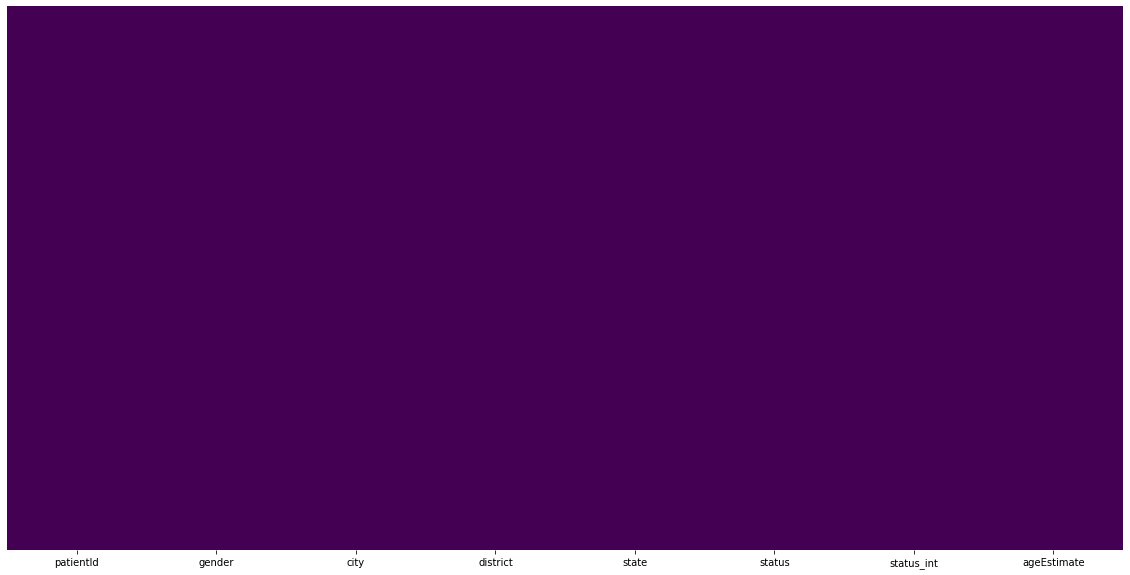

In [241]:
plt.figure(figsize=(20,10))
sns.heatmap(df_pre_final.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [242]:
df_pre_final.head(5)

,patientId,gender,city,district,state,status,status_int,ageEstimate
0,1,0,471,406,15,3,3,20.0
1,2,-1,11,8,15,3,3,45.0
2,3,-1,212,206,15,3,3,24.0
3,4,1,122,111,7,3,3,69.0
4,5,1,169,158,27,3,3,55.0


In [243]:
#female=0, male =1, NaN = -1
#need seperate files for deceased, recovered and hospitalized 

In [244]:
df_ageEstimate = df_pre_final[df_pre_final.columns[7]]
df_ageEstimate

0        20.000000
1        45.000000
2        24.000000
3        69.000000
4        55.000000
           ...    
27886    32.938258
27887    32.937983
27888    32.937707
27889    32.937432
27890    36.430086
Name: ageEstimate, Length: 27891, dtype: float64

In [245]:
df_ageEstimate.describe()

count    27891.000000
mean        38.096129
std          5.553127
min          0.300000
25%         36.004985
50%         38.053537
75%         40.120931
max         98.000000
Name: ageEstimate, dtype: float64

In [246]:
df_final_1 = df.copy()
df_final_1.drop('onsetEstimate',axis=1,inplace=True)
df_final_1.drop('contractedFrom',axis=1,inplace=True)
df_final_1.drop('notes',axis=1,inplace=True)
df_final_1.drop('city',axis=1,inplace=True)
df_final_1.drop('district',axis=1,inplace=True)
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   patientId    27891 non-null  int64 
 1   reportedOn   27891 non-null  object
 2   ageEstimate  2346 non-null   object
 3   gender       5313 non-null   object
 4   state        27890 non-null  object
 5   status       27891 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


In [247]:
array_ageEstimate=np.empty(27891,dtype = 'float')
array_ageEstimate  = df_ageEstimate.to_numpy(dtype='float')

df_final_1.insert(loc=2,column='newAgeEstimate',value = array_ageEstimate,allow_duplicates=True)

In [248]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patientId       27891 non-null  int64  
 1   reportedOn      27891 non-null  object 
 2   newAgeEstimate  27891 non-null  float64
 3   ageEstimate     2346 non-null   object 
 4   gender          5313 non-null   object 
 5   state           27890 non-null  object 
 6   status          27891 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.5+ MB


In [249]:
df_final_1.drop('ageEstimate',axis=1,inplace=True)

In [250]:
df_final_1.rename(columns={"newAgeEstimate":"ageEstimate"},inplace =True)

In [251]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   patientId    27891 non-null  int64  
 1   reportedOn   27891 non-null  object 
 2   ageEstimate  27891 non-null  float64
 3   gender       5313 non-null   object 
 4   state        27890 non-null  object 
 5   status       27891 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ MB


In [203]:
#downloading the neccessary values, with the predicted values
df_final_csv = df_final_1.copy()
final_data = df_final_csv.to_csv('final_data_compiled.csv', index = True) 
print('\nCSV String:\n', final_data) 


CSV String:
 None


In [ ]:
index_list_R = df_final_1[(df_final_1['status'] == 'Recovered')].index.tolist()
index_list_D = df_final_1[(df_final_1['status'] == 'Deceased')].index.tolist()
index_list_H = df_final_1[(df_final_1['status'] == 'Hospitalized')].index.tolist()
print(index_list_R)
print(index_list_D)
print(index_list_H)

In [255]:
row_D = df_final_1.iloc[index_list_D]
print(row_D)

       patientId  reportedOn  ageEstimate  gender              state    status
72            72  12/03/2020    20.000000  female              Delhi  Deceased
76            77  12/03/2020    26.000000    male        Maharashtra  Deceased
81            74  13/03/2020    34.000000    male          Karnataka  Deceased
181          182  19/03/2020    57.000000    male             Punjab  Deceased
269          270  21/03/2020    26.000000    male        Maharashtra  Deceased
293          294  21/03/2020    40.000000    male            Gujarat  Deceased
326          327  21/03/2020    57.000000    male        West Bengal  Deceased
347          348  22/03/2020    26.000000    male              Bihar  Deceased
379          380  22/03/2020    24.000000    male             Kerala  Deceased
430          430  23/03/2020     1.000000  female            Gujarat  Deceased
478          487  23/03/2020    76.000000    male   Himachal Pradesh  Deceased
493          502  23/03/2020    21.000000    male   

In [256]:
row_R = df_final_1.iloc[index_list_R]
print(row_R)

      patientId  reportedOn  ...                        state     status
0             1  30/01/2020  ...                       Kerala  Recovered
1             2  02/02/2020  ...                       Kerala  Recovered
2             3  03/02/2020  ...                       Kerala  Recovered
3             4  02/03/2020  ...                        Delhi  Recovered
4             5  02/03/2020  ...                    Telangana  Recovered
...         ...         ...  ...                          ...        ...
1260       1261  30/03/2020  ...                       Kerala  Recovered
1420       1421  31/03/2020  ...                    Karnataka  Recovered
1608       1609  31/03/2020  ...                 Chhattisgarh  Recovered
1947       1948  01/04/2020  ...                    Karnataka  Recovered
5477       5478  08/04/2020  ...  Andaman and Nicobar Islands  Recovered

[182 rows x 6 columns]


In [258]:
row_H = df_final_1.iloc[index_list_H]
print(row_H)

       patientId  reportedOn  ageEstimate  gender          state        status
18            19  04/03/2020    70.000000     NaN        Haryana  Hospitalized
19            20  04/03/2020    45.000000     NaN        Haryana  Hospitalized
21            22  04/03/2020    27.000000    male  Uttar Pradesh  Hospitalized
26            27  04/03/2020    24.000000     NaN  Uttar Pradesh  Hospitalized
27            28  04/03/2020    54.000000     NaN  Uttar Pradesh  Hospitalized
...          ...         ...          ...     ...            ...           ...
27886      27887  26/04/2020    32.938258     NaN          Delhi  Hospitalized
27887      27888  26/04/2020    32.937983     NaN    Uttarakhand  Hospitalized
27888      27889  26/04/2020    32.937707  female          Bihar  Hospitalized
27889      27890  26/04/2020    32.937432  female          Bihar  Hospitalized
27890      27891  26/04/2020    36.430086  female          Bihar  Hospitalized

[27663 rows x 6 columns]


In [264]:
print("Deceased info:\n ")
row_D.info()
print("\nHospitalized info:\n ")
row_H.info()
print("\nRecoveredinfo:\n ")
row_R.info()

Deceased info:
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 72 to 16136
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   patientId    45 non-null     int64  
 1   reportedOn   45 non-null     object 
 2   ageEstimate  45 non-null     float64
 3   gender       43 non-null     object 
 4   state        45 non-null     object 
 5   status       45 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB

Hospitalized info:
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27663 entries, 18 to 27890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   patientId    27663 non-null  int64  
 1   reportedOn   27663 non-null  object 
 2   ageEstimate  27663 non-null  float64
 3   gender       5146 non-null   object 
 4   state        27662 non-null  object 
 5   status       27663 non-null  object 
dtypes: floa

In [265]:
final_data_deceased = row_D.to_csv('final_data_deceased.csv', index = True) 
print('\nCSV String:\n', final_data_deceased)
final_data_hospitalized =  row_H.to_csv('final_data_hospitalized.csv', index = True) 
print('\nCSV String:\n', final_data_hospitalized)
final_data_recovered = row_D.to_csv('final_data_recovered.csv', index = True) 
print('\nCSV String:\n', final_data_recovered)


CSV String:
 None

CSV String:
 None

CSV String:
 None
